## Sensitivity Analysis of Canadian Oil and Gas Companies' Stock Prices to WTI Price Fluctuations ##

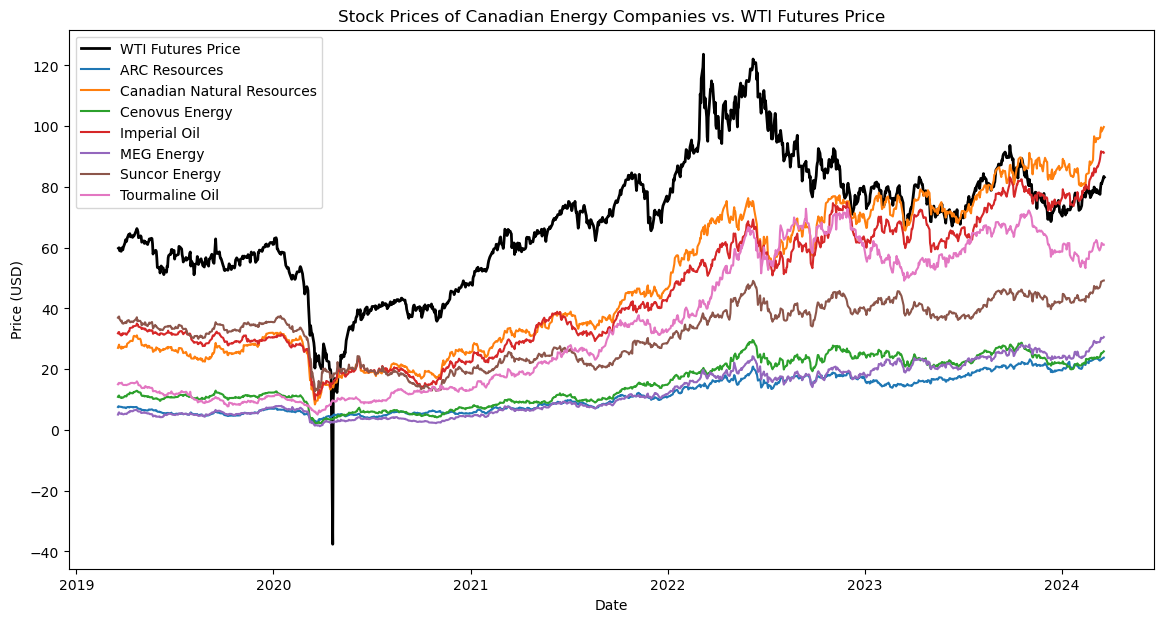

In [9]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define functions to fetch historical data
def fetch_historical_data(ticker):
    return yf.Ticker(ticker).history(period="5y")['Close']

# Selected Canadian energy companies (Large Caps)
companies = {
    "ARC Resources": "ARX.TO",
    "Canadian Natural Resources": "CNQ.TO",
    "Cenovus Energy": "CVE.TO",
    "Imperial Oil": "IMO.TO",
    "MEG Energy": "MEG.TO",
    "Suncor Energy": "SU.TO",
    "Tourmaline Oil": "TOU.TO",
}

# Fetching crude oil prices
oil_prices = fetch_historical_data("CL=F")

# Prepare to collect results
results_data = []

# Initialize the figure for plotting stock prices
plt.figure(figsize=(14, 7))

# Plot crude oil prices
plt.plot(oil_prices.index, oil_prices, label='WTI Futures Price', color='black', linewidth=2)

# Loop through companies, fetch data, plot, and analyze
for company_name, ticker in companies.items():
    company_data = fetch_historical_data(ticker)
    
    # Plot company stock prices
    plt.plot(company_data.index, company_data, label=company_name)
    
    # Align data by date and drop NaN values
    combined = pd.DataFrame({'Oil Prices': oil_prices, 'Stock Prices': company_data}).dropna()
    
    # Perform correlation and linear regression analysis
    correlation = combined.corr().iloc[0, 1]
    slope, intercept, _, _, _ = linregress(combined['Oil Prices'], combined['Stock Prices'])
    
    # Collect results
    results_data.append([company_name, correlation, slope])

# Create DataFrame from the collected data
results_df = pd.DataFrame(results_data, columns=['Company', 'Correlation', 'Slope'])

# Finalizing the plot with legends and labels
plt.title('Stock Prices of Canadian Energy Companies vs. WTI Futures Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

### Correlation Coefficient: ###
Value Range: The correlation coefficient values range between -1 and 1. A value closer to 1 indicates a strong positive correlation, meaning that as WTI prices increase, the company's stock price tends to increase as well. A value closer to -1 indicates a strong negative correlation.

### Slope (from Linear Regression): ###
Interpretation: The slope indicates how much the stock price of a company changes for a one-unit change in WTI prices. A higher slope means a greater change in the stock price relative to changes in WTI prices.

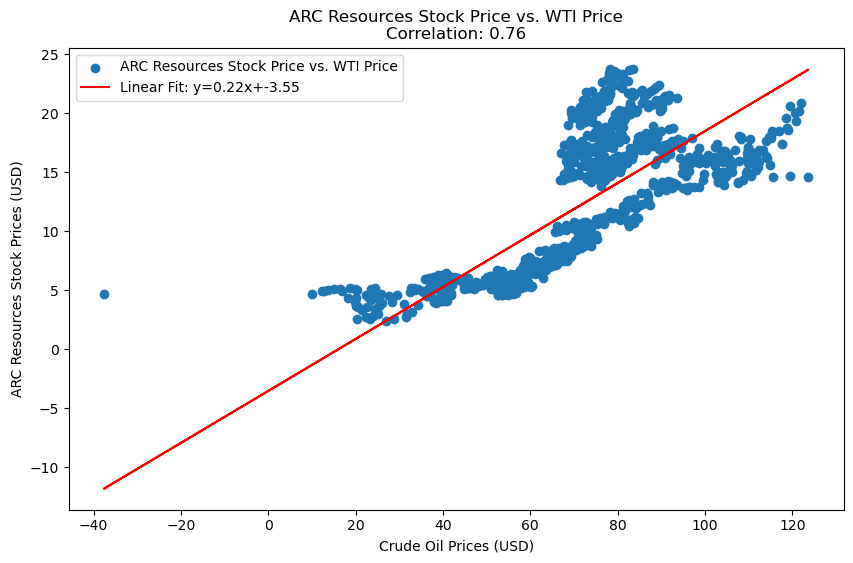

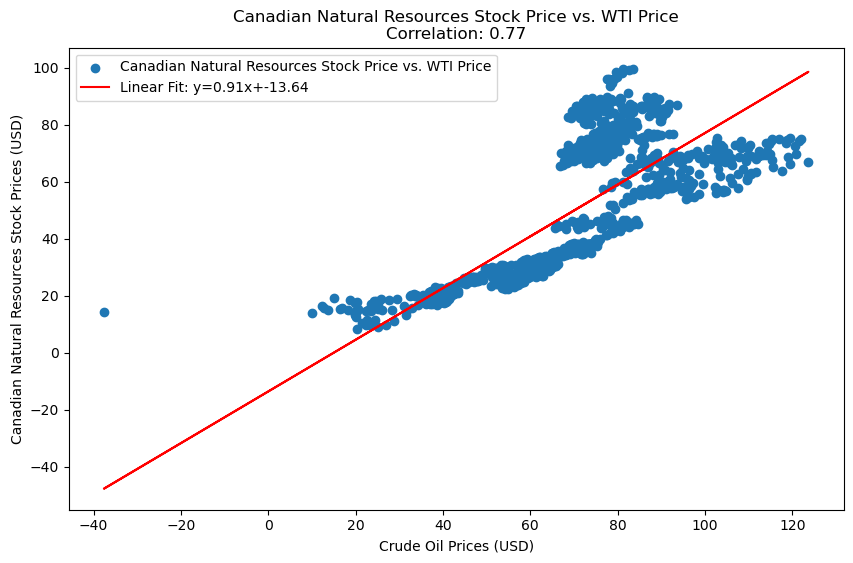

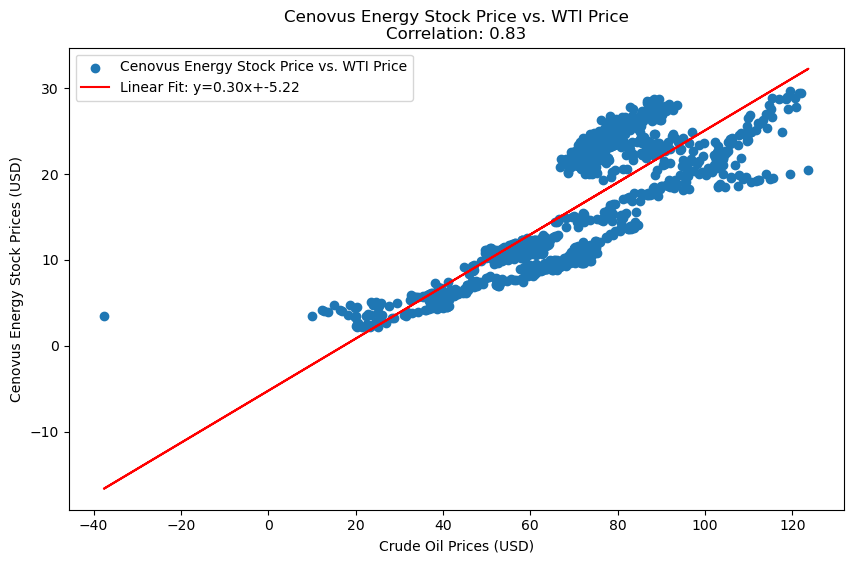

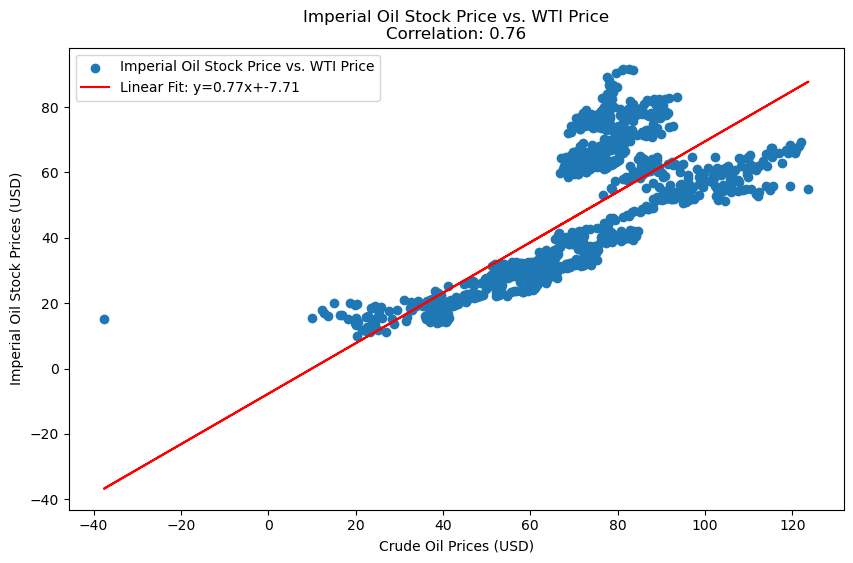

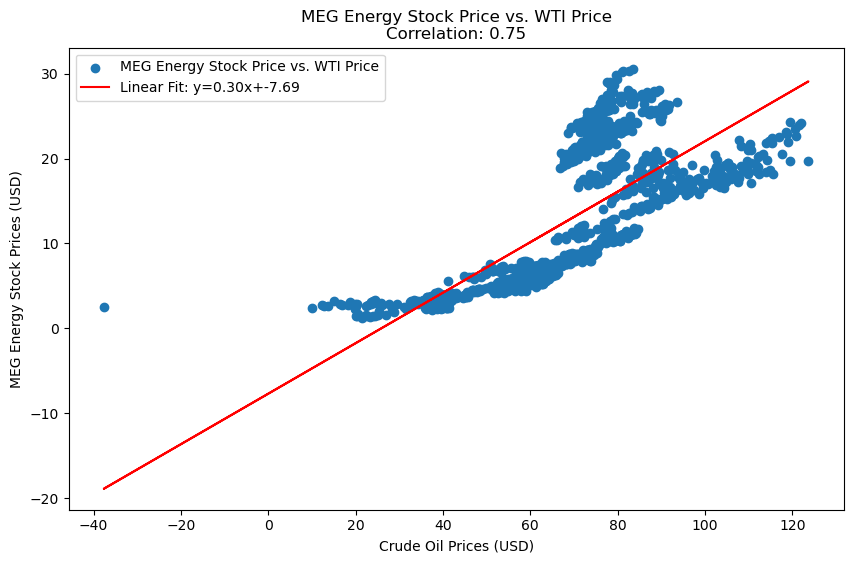

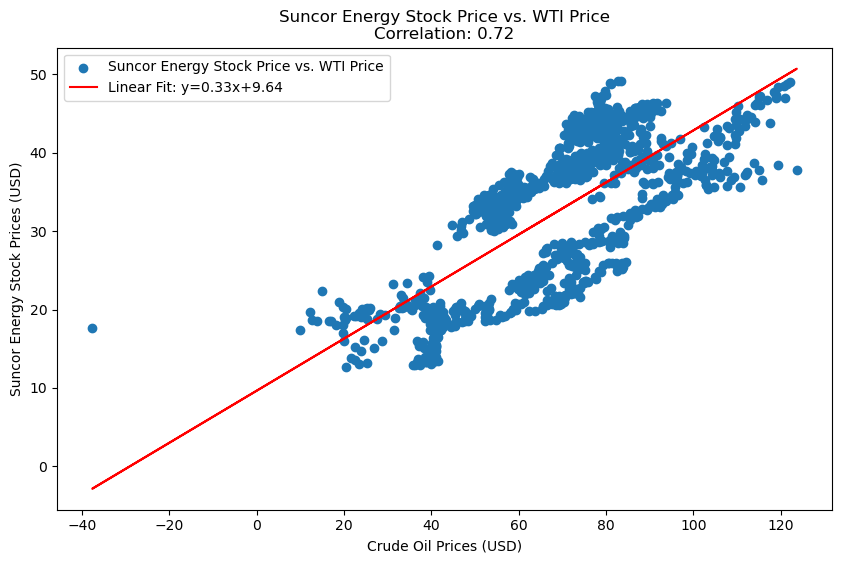

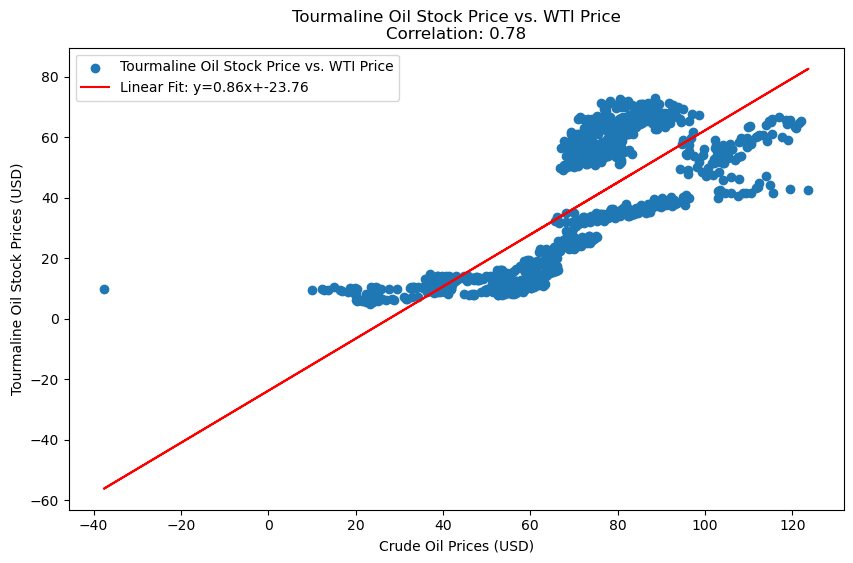

                       Company  Correlation     Slope
0                ARC Resources     0.760633  0.220414
1   Canadian Natural Resources     0.766323  0.907839
2               Cenovus Energy     0.826244  0.302901
3                 Imperial Oil     0.758462  0.772132
4                   MEG Energy     0.750794  0.297316
5                Suncor Energy     0.722582  0.332165
6               Tourmaline Oil     0.776155  0.860189
7                ARC Resources     0.760633  0.220414
8   Canadian Natural Resources     0.766323  0.907839
9               Cenovus Energy     0.826244  0.302901
10                Imperial Oil     0.758462  0.772132
11                  MEG Energy     0.750794  0.297316
12               Suncor Energy     0.722582  0.332165
13              Tourmaline Oil     0.776155  0.860189


In [10]:
for company_name, ticker in companies.items():
    company_data = fetch_historical_data(ticker)
    combined = pd.DataFrame({'Oil Prices': oil_prices, 'Stock Prices': company_data}).dropna()
    correlation = combined.corr().iloc[0, 1]
    slope, intercept, r_value, p_value, std_err = linregress(combined['Oil Prices'], combined['Stock Prices'])
    
    # Plotting individual graphs for each company with regression line and correlation
    plt.figure(figsize=(10, 6))
    plt.scatter(combined['Oil Prices'], combined['Stock Prices'], label=f'{company_name} Stock Price vs. WTI Price')
    plt.plot(combined['Oil Prices'], intercept + slope*combined['Oil Prices'], 'r', label=f'Linear Fit: y={slope:.2f}x+{intercept:.2f}')
    plt.title(f'{company_name} Stock Price vs. WTI Price\nCorrelation: {correlation:.2f}')
    plt.xlabel('Crude Oil Prices (USD)')
    plt.ylabel(f'{company_name} Stock Prices (USD)')
    plt.legend()
    plt.show()
    
    results_data.append([company_name, correlation, slope])

results_df = pd.DataFrame(results_data, columns=['Company', 'Correlation', 'Slope'])
print(results_df)


### Correlation Coefficient: ###
Interpretation: All companies listed show a positive correlation coefficient, ranging from approximately 0.72 to 0.83. This indicates a strong positive relationship between WTI prices and the stock prices of these Canadian energy companies. In simpler terms, when WTI prices go up, the stock prices of these companies tend to increase, and vice versa.

### Slope (from Linear Regression): ###

Specific Values:
Canadian Natural Resources and Tourmaline Oil show the highest slopes (approximately 0.908 and 0.860, respectively), suggesting their stock prices are highly sensitive to changes in WTI prices. A $\$$1 increase in crude oil prices is associated with a $\$$0.908 and \$0.860 increase in their stock prices, respectively. ARC Resources, Cenovus Energy, Imperial Oil, MEG Energy, and Suncor Energy also show positive slopes but to a lesser extent compared to Canadian Natural Resources and Tourmaline Oil. This indicates that their stock prices are also positively influenced by crude oil prices but are slightly less sensitive compared to the first two.